# Precios de venta en coches de segunda mano

## Analisis Exploratorio de Datos

In [1]:
# Importamos las librerias necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import phik

##### Carga de datos

Nuestro archivo procede de la web Datamarket.es y contiene **anuncios de venta de coches de segunda mano en las principales plataformas.**

Es una web en la que existen muchos datasets de diferentes tipologías  y, además, tienes la posibilidad de descargar Datasets de prueba sin coste alguno.



In [2]:
'''Cargamos el Dataset (csv) en un DataFrame y mostramos las cinco primeras filas'''

anuncios = pd.read_csv('data/coches-de-segunda-mano-sample.csv')
anuncios.head()

,url,company,make,model,version,price,price_financed,fuel,year,kms,...,doors,shift,color,photos,is_professional,dealer,province,country,publish_date,insert_date
0,e158ae0ca53119ca199c28c36b5c2fcd,9881bcdd5a0ad4733037b3fb25e69c3a,SEAT,Toledo,SEAT Toledo 4p.,950,NaN,Diésel,2000.0,227000,...,4,Manual,Verde,5,False,0f4bb8455d27349b8273109b66a847f3,Navarra,Spain,2020-12-18 10:47:13,2021-01-15 00:00:00
1,ff267ebb7e700246f47f84f3db660b4b,9881bcdd5a0ad4733037b3fb25e69c3a,CITROEN,C1,CITROEN C1 PureTech 60KW 82CV Feel 5p.,6200,NaN,Gasolina,2017.0,50071,...,5,Manual,Blanco,6,True,Autos Raymara,Tenerife,Spain,2021-01-02 11:25:40,2021-01-15 00:00:00
2,de4b02db28ea7786c622b969be10c7c7,9881bcdd5a0ad4733037b3fb25e69c3a,FORD,Transit Connect,FORD Transit Connect Van 1.5 TDCi 100cv Ambien...,7851,7024.0,Diésel,2016.0,103000,...,4,Manual,Blanco,10,True,Auto 96,Barcelona,Spain,2020-12-16 10:51:45,2021-01-15 00:00:00
3,0449972a4d07594acf92e9a7dd28b39c,9881bcdd5a0ad4733037b3fb25e69c3a,VOLKSWAGEN,Caravelle,VOLKSWAGEN Caravelle Largo 2.0 TDI 140 Comfort...,19426,NaN,Diésel,2014.0,120000,...,4,Manual,Blanco,9,True,Inniauto,Navarra,Spain,2020-11-25 11:09:14,2021-01-15 00:00:00
4,12c4fa49bd4fdf23f19ecf396d3f02ef,9881bcdd5a0ad4733037b3fb25e69c3a,FORD,Transit,FORD Transit 350 96kW L4 Ambiente Propulsion T...,22850,22800.0,Diésel,2017.0,107000,...,2,Manual,Blanco,4,True,"Autofleet España,s.l",Sevilla,Spain,2021-01-12 20:00:34,2021-01-15 00:00:00


##### Estadísticos

In [3]:
'''A continuación calculamos los estadísticos más comunes para las columnas numéricas'''

anuncios.describe()

,price,price_financed,year,kms,power,doors,photos
count,50000.000000,23563.000000,49998.000000,5.000000e+04,41472.000000,50000.000000,50000.000000
mean,15166.270260,18480.029283,2012.311032,1.163591e+05,146.396388,4.505380,16.199120
std,16485.669747,13389.800738,6.677760,1.072921e+05,71.283964,0.868001,12.422882
min,300.000000,700.000000,1970.000000,0.000000e+00,29.000000,2.000000,0.000000
25%,5500.000000,10790.000000,2007.000000,3.830000e+04,109.000000,4.000000,7.000000
50%,11750.000000,15500.000000,2015.000000,9.999900e+04,130.000000,5.000000,13.000000
75%,19800.000000,21995.000000,2018.000000,1.749000e+05,163.000000,5.000000,23.000000
max,549900.000000,428999.000000,2021.000000,5.000000e+06,800.000000,5.000000,54.000000


In [4]:
'''Mostramos toda la información contenida en el Dataset'''

anuncios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              50000 non-null  object 
 1   company          50000 non-null  object 
 2   make             49998 non-null  object 
 3   model            49995 non-null  object 
 4   version          50000 non-null  object 
 5   price            50000 non-null  int64  
 6   price_financed   23563 non-null  float64
 7   fuel             49954 non-null  object 
 8   year             49998 non-null  float64
 9   kms              50000 non-null  int64  
 10  power            41472 non-null  float64
 11  doors            50000 non-null  int64  
 12  shift            49889 non-null  object 
 13  color            49406 non-null  object 
 14  photos           50000 non-null  int64  
 15  is_professional  50000 non-null  bool   
 16  dealer           50000 non-null  object 
 17  province    

Podemos observar que el dataset tiene un total de 21 columnas.

Cuenta con algunos NaN en muchas de las columnas y tiene variedad de tipologías.

In [5]:
''' Vemos los nombres de las columnas que contiene la base de datos'''

anuncios.columns

Index(['url', 'company', 'make', 'model', 'version', 'price', 'price_financed',
       'fuel', 'year', 'kms', 'power', 'doors', 'shift', 'color', 'photos',
       'is_professional', 'dealer', 'province', 'country', 'publish_date',
       'insert_date'],
      dtype='object')

In [6]:
'''Observamos el número de filas y columnas con las que cuenta el Dataset'''

print('Filas:', anuncios.shape[0])
print('Columnas:', anuncios.shape[1])


Filas: 50000
Columnas: 21


#### Análisis Exploratorio de los Datos

In [7]:
''' Calculamos si existe correlacion lineal entre las variables'''

anuncios.corr()

,price,price_financed,year,kms,power,doors,photos,is_professional
price,1.000000,0.997199,0.476886,-0.394514,0.693192,-0.012302,0.295480,0.339699
price_financed,0.997199,1.000000,0.329882,-0.326330,0.741984,-0.050866,0.085678,NaN
year,0.476886,0.329882,1.000000,-0.620422,0.027102,0.262363,0.417768,0.612190
kms,-0.394514,-0.326330,-0.620422,1.000000,-0.012646,-0.105178,-0.294141,-0.447068
power,0.693192,0.741984,0.027102,-0.012646,1.000000,-0.158604,0.153927,0.003982
doors,-0.012302,-0.050866,0.262363,-0.105178,-0.158604,1.000000,0.095306,0.158235
photos,0.295480,0.085678,0.417768,-0.294141,0.153927,0.095306,1.000000,0.565329
is_professional,0.339699,NaN,0.612190,-0.447068,0.003982,0.158235,0.565329,1.000000


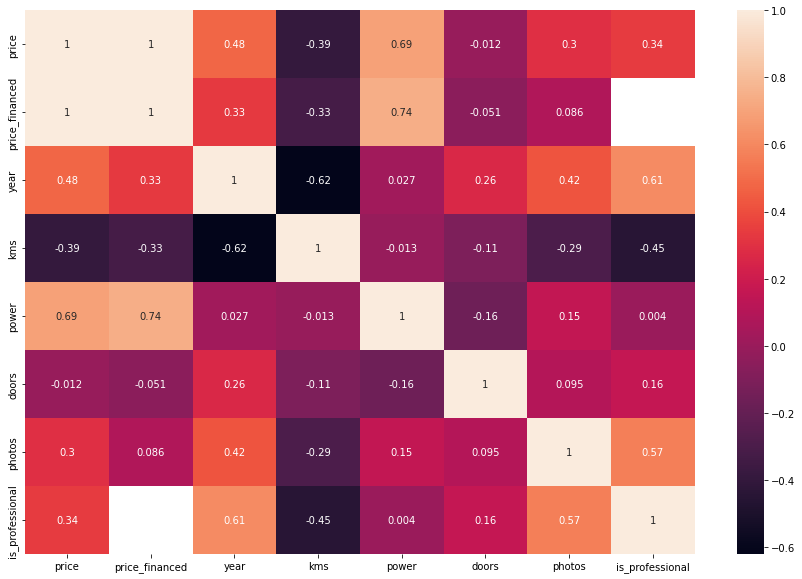

In [8]:
# Mostramos la correlación en un mapa de calor para poder visualizarlo mejor

plt.figure(figsize=(15,10))
sns.heatmap(anuncios.corr(), annot=True);

In [9]:
'''Observamos solo la correlación con respecto al precio en valores absolutos
y ordenados de forma descendente'''

np.abs(anuncios.corr()['price']).sort_values(ascending=False)


price              1.000000
price_financed     0.997199
power              0.693192
year               0.476886
kms                0.394514
is_professional    0.339699
photos             0.295480
doors              0.012302
Name: price, dtype: float64

Observamos que, al ser variables numéricas, la que más correlación tiene con el precio es la potencia del vehículo.

Sin embargo, vamos a utilizar el coeficiente de phik para poder medir también la correlación de las variables categóricas.

In [10]:
'''Guardamos en una variable las columnas más relevantes de nuestra base de datos para que
    el coeficiente se pueda calcular más rápido'''

cols = ['make', 'model', 'price', 'fuel', 'year', 'kms', 'power', 'doors', 'province']
anuncios[cols].phik_matrix()

interval columns not set, guessing: ['price', 'year', 'kms', 'power', 'doors']


,make,model,price,fuel,year,kms,power,doors,province
make,1.000000,0.999935,0.630297,0.609467,0.291619,0.000000,0.728843,0.527264,0.218280
model,0.999935,1.000000,0.836472,0.884765,0.853526,0.200061,0.939522,0.907378,0.414294
price,0.630297,0.836472,1.000000,0.098020,0.086578,0.000000,0.637399,0.132500,0.000000
fuel,0.609467,0.884765,0.098020,1.000000,0.221285,0.000000,0.268269,0.207396,0.187887
year,0.291619,0.853526,0.086578,0.221285,1.000000,0.064130,0.083448,0.266756,0.173120
kms,0.000000,0.200061,0.000000,0.000000,0.064130,1.000000,0.000000,0.013343,0.029391
power,0.728843,0.939522,0.637399,0.268269,0.083448,0.000000,1.000000,0.323719,0.105253
doors,0.527264,0.907378,0.132500,0.207396,0.266756,0.013343,0.323719,1.000000,0.124105
province,0.218280,0.414294,0.000000,0.187887,0.173120,0.029391,0.105253,0.124105,1.000000


interval columns not set, guessing: ['price', 'year', 'kms', 'power', 'doors']


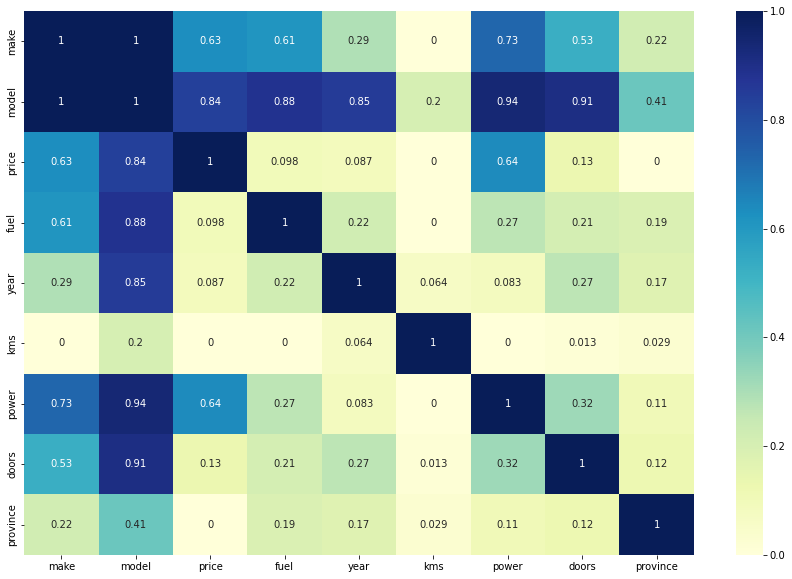

In [11]:
# Generamos un mapa de calor

plt.figure(figsize=(15,10))
sns.heatmap(anuncios[cols].phik_matrix(), cmap= "YlGnBu", annot=True);

In [12]:
'''Ordenamos la correlación del precio en valores absolutos para visualizarlos mejor'''
np.abs(anuncios[cols].phik_matrix()['price']).sort_values(ascending=False)

interval columns not set, guessing: ['price', 'year', 'kms', 'power', 'doors']


price       1.000000
model       0.836472
power       0.637399
make        0.630297
doors       0.132500
fuel        0.098020
year        0.086578
kms         0.000000
province    0.000000
Name: price, dtype: float64

##### Gráficos

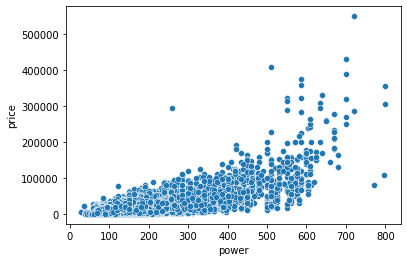

In [13]:
'''Representación gráfica del precio de los coches con respecto a la potencia'''

sns.scatterplot(x = anuncios['power'], y=anuncios['price']);

Comprobamos cómo de gaussiana es nuestra distribución del precio.

Para ello, vamos a comparar nuestro datos originales con una transformación logaritmica y Box-Cox.

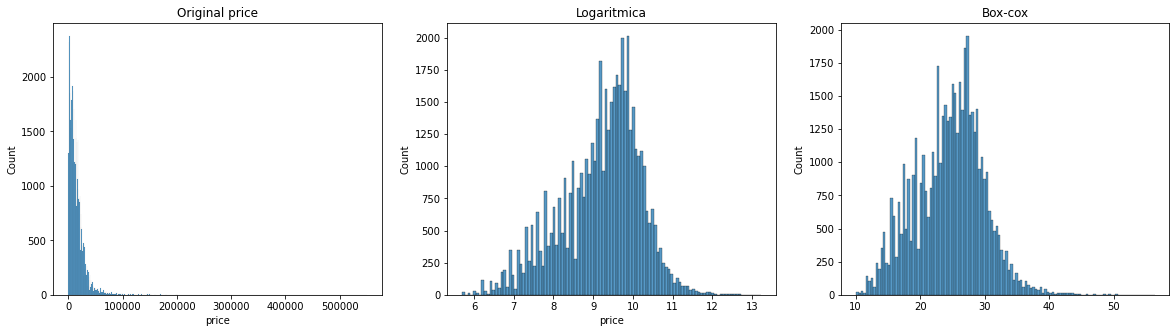

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(20,5))

# Original

sns.histplot(anuncios['price'], kde=False, ax= axes[0])
axes[0].set_title('Original price')

# Logaritmica

sns.histplot(np.log(anuncios['price']), kde= False, ax = axes[1])
axes[1].set_title('Logaritmica')

# Box-cox

sns.histplot(stats.boxcox(anuncios['price'])[0], kde=False, ax= axes[2])
axes[2].set_title('Box-cox');

Comprobamos que realizando una transformación logaritmica nuestros datos queda distribuidos de forma más "normal".

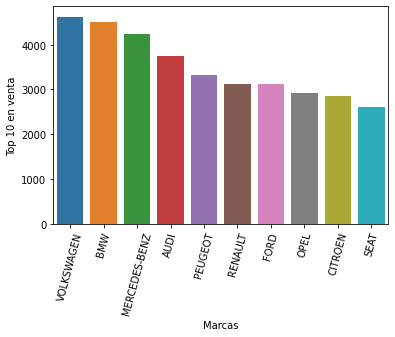

In [15]:
'''A continuación vemos la distribución de cuáles son las marcas de coches que más se anuncian'''

sns.barplot(x=anuncios['make'].value_counts()[:10].keys(), y=anuncios['make'].value_counts()[:10])
plt.ylabel('Top 10 en venta')
plt.xlabel('Marcas')
plt.xticks(rotation=75);

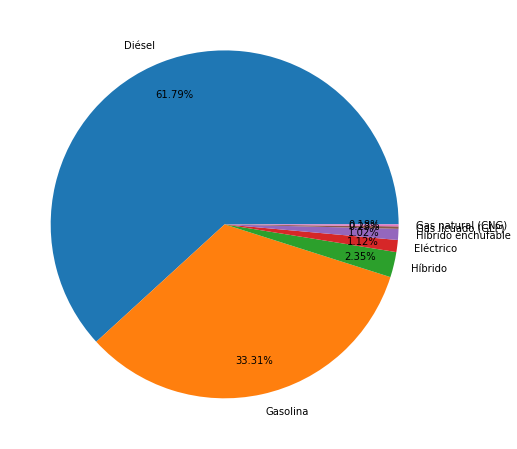

In [16]:
'''Mostramos la distribución de los vehículos en función del tipo de combustible que utilizan'''

plt.figure(figsize=(8,8))
plt.pie(anuncios['fuel'].value_counts()/(anuncios['fuel'].value_counts().sum())*100, 
        labels=anuncios['fuel'].value_counts().keys(), autopct='%.2f%%', pctdistance=0.8);


Se puede evidenciar que más del 90 % de los vehículos que están anunciados son Diésel o Gasolina.

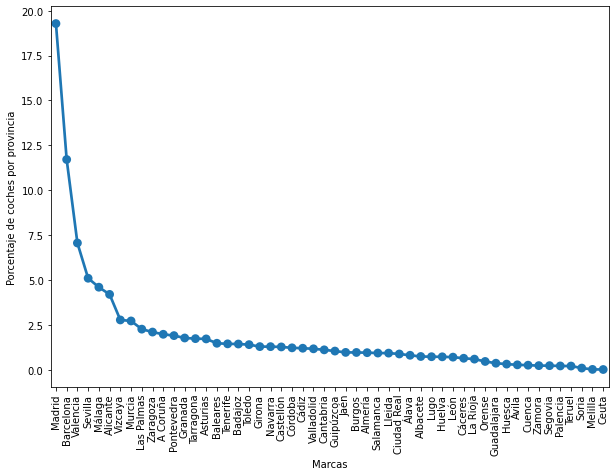

In [17]:
'''Distribución de anuncios por provincia'''

plt.figure(figsize=(10,7))

sns.pointplot(x=anuncios['province'].value_counts().keys(), y=anuncios['province'].value_counts()/(anuncios['make'].value_counts().sum())*100)
plt.ylabel('Porcentaje de coches por provincia')
plt.xlabel('Marcas')
plt.xticks(rotation=90);

Aquí podemos ver que son Madrid y Barcelona las ciudades que concentran el mayor número de anuncios de venta de coches de segunda mano.

## Machine Learning

### Preprocesado de Datos

De nuestro dataframe creado `anuncios` vamos a eliminar las columnas que no son útiles para nuestro caso

In [18]:
anuncios = anuncios.drop(columns=['url', 'company', 'version', 'price_financed', 'kms', 'doors',
                         'shift', 'color', 'photos', 'is_professional', 'dealer', 
                         'country', 'publish_date', 'insert_date'])
anuncios.head()

,make,model,price,fuel,year,power,province
0,SEAT,Toledo,950,Diésel,2000.0,NaN,Navarra
1,CITROEN,C1,6200,Gasolina,2017.0,82.0,Tenerife
2,FORD,Transit Connect,7851,Diésel,2016.0,100.0,Barcelona
3,VOLKSWAGEN,Caravelle,19426,Diésel,2014.0,140.0,Navarra
4,FORD,Transit,22850,Diésel,2017.0,130.0,Sevilla


A continuación vamos a eliminar las filas NaN de la columna "make" ya que no tiene ningún sentido entrenar un modelo para predecir el precio de un vehículo sin marca

In [19]:
anuncios = anuncios.dropna(subset=['make'])
anuncios.head()

,make,model,price,fuel,year,power,province
0,SEAT,Toledo,950,Diésel,2000.0,NaN,Navarra
1,CITROEN,C1,6200,Gasolina,2017.0,82.0,Tenerife
2,FORD,Transit Connect,7851,Diésel,2016.0,100.0,Barcelona
3,VOLKSWAGEN,Caravelle,19426,Diésel,2014.0,140.0,Navarra
4,FORD,Transit,22850,Diésel,2017.0,130.0,Sevilla


In [20]:
anuncios.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49998 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   make      49998 non-null  object 
 1   model     49993 non-null  object 
 2   price     49998 non-null  int64  
 3   fuel      49952 non-null  object 
 4   year      49996 non-null  float64
 5   power     41470 non-null  float64
 6   province  49992 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 3.1+ MB


In [122]:
# Librerias
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
import category_encoders as ce
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import pickle

#### Separamos el Dataset en X e Y

In [22]:
X = anuncios.drop(columns=['price'])
y = anuncios['price']

#### Dividimos en Train y Test

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)

In [24]:
# Vemos los tamaños de nuestros datos

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(34998, 6)
(15000, 6)
(34998,)
(15000,)


#### Tratamiento missings

Para que una vez preparado el modelo no se nos pase hacer los mismos cambios en X_test, lo vamos a hacer sobre a la misma vez que con X_train

Comprobamos qué variables tienen missings

In [25]:
X_train.isnull().sum()

make           0
model          4
fuel          33
year           1
power       5994
province       2
dtype: int64

In [26]:
X_test.isnull().sum()

make           0
model          1
fuel          13
year           1
power       2534
province       4
dtype: int64

Cambiamos el tipo de dato en "year" y "power"

In [27]:
X_train['year'] = X_train['year'].astype('int64', errors='ignore')
X_train['power'] = X_train['power'].astype('int64', errors='ignore')

In [28]:
X_test['year'] = X_test['year'].astype('int64', errors='ignore')
X_test['power'] = X_test['power'].astype('int64', errors='ignore')

Separamos en dos listas los distintos tipos de datos: categóricas y numéricas

In [29]:
categorica = ['model', 'fuel', 'province']

Rellenamos missings de las categóricas con la moda.

En X_test rellenamos con la moda que hemos aplicado en X_train

In [30]:
for c in categorica:
    X_train[c].fillna(X_train[c].mode()[0], inplace=True)
    X_test[c].fillna(X_train[c].mode()[0], inplace=True)

    

In [31]:
numerico = ['year', 'power']

Rellenamos missings de las numéricas con la mediana.

En X_test rellenamos con la mediana que hemos aplicado en X_train

In [32]:
for c in numerico:
    X_train[c].fillna(X_train[c].median(), inplace=True)
    X_test[c].fillna(X_train[c].median(), inplace=True)

Cambiamos el tipo de dato

In [33]:
X_train['year'] = X_train['year'].astype('int64', errors='ignore')
X_train['power'] = X_train['power'].astype('int64', errors='ignore')

In [34]:
X_test['year'] = X_test['year'].astype('int64', errors='ignore')
X_test['power'] = X_test['power'].astype('int64', errors='ignore')

Confirmamos que hemos dejado sin missings ambos conjuntos

In [35]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34998 entries, 38093 to 15796
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   make      34998 non-null  object
 1   model     34998 non-null  object
 2   fuel      34998 non-null  object
 3   year      34998 non-null  int64 
 4   power     34998 non-null  int64 
 5   province  34998 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [36]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 33553 to 15110
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   make      15000 non-null  object
 1   model     15000 non-null  object
 2   fuel      15000 non-null  object
 3   year      15000 non-null  int64 
 4   power     15000 non-null  int64 
 5   province  15000 non-null  object
dtypes: int64(2), object(4)
memory usage: 820.3+ KB


Unimos en una sola columna Marca y Modelo de coche para posteriormente transformarlo en una variable numérica y estandarizarlo para nuestro modelo.

Eliminamos dichas columnas para que nuestro modelo no necesite luego esos inputs.

In [37]:
X_train.insert(2, 'marca_modelo', X_train[['make', 'model']].apply('_'.join, axis=1))
X_train.head()

,make,model,marca_modelo,fuel,year,power,province
38093,MERCEDES-BENZ,Clase C,MERCEDES-BENZ_Clase C,Diésel,2014,170,Madrid
36015,VOLKSWAGEN,Touareg,VOLKSWAGEN_Touareg,Diésel,2007,240,Barcelona
40354,CITROEN,C1,CITROEN_C1,Gasolina,2020,72,Valencia
33939,NISSAN,Almera,NISSAN_Almera,Diésel,2001,130,Valencia
41707,SKODA,Fabia,SKODA_Fabia,Gasolina,2020,95,Barcelona


In [38]:
X_train = X_train.drop(columns=['make', 'model'])
X_train.head()

,marca_modelo,fuel,year,power,province
38093,MERCEDES-BENZ_Clase C,Diésel,2014,170,Madrid
36015,VOLKSWAGEN_Touareg,Diésel,2007,240,Barcelona
40354,CITROEN_C1,Gasolina,2020,72,Valencia
33939,NISSAN_Almera,Diésel,2001,130,Valencia
41707,SKODA_Fabia,Gasolina,2020,95,Barcelona


In [39]:
X_test.insert(2, 'marca_modelo', X_test[['make', 'model']].apply('_'.join, axis=1))
X_test.head()

,make,model,marca_modelo,fuel,year,power,province
33553,MERCEDES-BENZ,Clase C,MERCEDES-BENZ_Clase C,Diésel,2007,130,Murcia
9428,VOLKSWAGEN,Passat,VOLKSWAGEN_Passat,Diésel,2013,140,Valencia
199,BMW,X6,BMW_X6,Diésel,2018,258,Madrid
12448,BMW,X4,BMW_X4,Diésel,2015,190,Barcelona
39488,PEUGEOT,406,PEUGEOT_406,Diésel,2000,130,Tarragona


In [40]:
X_test = X_test.drop(columns=['make', 'model'])
X_test.head()

,marca_modelo,fuel,year,power,province
33553,MERCEDES-BENZ_Clase C,Diésel,2007,130,Murcia
9428,VOLKSWAGEN_Passat,Diésel,2013,140,Valencia
199,BMW_X6,Diésel,2018,258,Madrid
12448,BMW_X4,Diésel,2015,190,Barcelona
39488,PEUGEOT_406,Diésel,2000,130,Tarragona


### Problema de Machine Learning

Como hemos comentado desde el inicio lo que pretendemos con este proyecto es crear un modelo que nos prediga el precio de venta de un vehículo de segunda mano en función de sus características.

Por lo tanto, nos encontramos con un problema de Regresión de tipo Supervisado.

Estas son las features con las que vamos a trabajar:
 + Marca
 + Modelo
 + Combustible
 + Antigüedad del vehículo
 + Potencia
 + Provincia

### Transformación de Variables Categóricas en Numéricas

In [41]:
cbe_encoder = ce.cat_boost.CatBoostEncoder()
cbe_encoder.fit(X_train, y_train)
X_train = cbe_encoder.transform(X_train)

In [42]:
X_train

,marca_modelo,fuel,year,power,province
38093,20243.667855,13810.739968,2014,170,16705.106101
36015,17545.313737,13810.739968,2007,240,17253.667987
40354,8654.766391,15954.017324,2020,72,16197.500210
33939,1660.725509,13810.739968,2001,130,16197.500210
41707,7669.266174,15954.017324,2020,95,17253.667987
...,...,...,...,...,...
11285,12786.409028,13810.739968,2016,116,14288.024074
44733,14828.577660,13810.739968,2014,190,15687.217992
38159,11902.876627,13810.739968,2011,130,14378.235506
860,3292.612243,13810.739968,2005,80,16705.106101


In [43]:
X_test = cbe_encoder.transform(X_test)

In [44]:
X_test

,marca_modelo,fuel,year,power,province
33553,20243.667855,13810.739968,2007,130,13244.862090
9428,11471.638041,13810.739968,2013,140,16197.500210
199,38223.703955,13810.739968,2018,258,16705.106101
12448,35904.276213,13810.739968,2015,190,17253.667987
39488,1903.611677,13810.739968,2000,130,14242.418522
...,...,...,...,...,...
15169,11360.163768,13810.739968,2002,130,12368.011295
34875,7548.742593,13810.739968,2010,127,16705.106101
39316,13102.144728,13810.739968,2005,140,16186.446064
42190,21203.250196,15954.017324,2018,115,14378.235506


### Estandarización de features numéricas

In [45]:
escaler = StandardScaler()
escaler.fit(X_train)
X_train_scal = escaler.transform(X_train)

In [54]:
X_test_scal = escaler.transform(X_test)

In [46]:
minmax = MinMaxScaler()
minmax.fit(X_train)
X_minmax = minmax.transform(X_train)

Comprobamos que las distribuciones no cambian independientemente de que se aplique estandarización

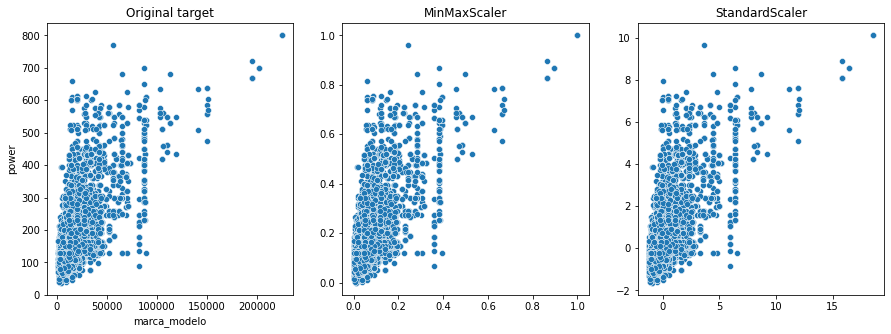

In [47]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original target
sns.scatterplot(x= X_train.iloc[:,0], y= X_train.iloc[:,3], ax=axes[0])
axes[0].set_title("Original target")
# MinMaxScaler
sns.scatterplot(x= X_minmax[:,0], y= X_minmax[:,3], ax=axes[1])
axes[1].set_title("MinMaxScaler")

# StandardScaler
sns.scatterplot(x= X_train_scal[:,0], y= X_train_scal[:,3], ax=axes[2])
axes[2].set_title("StandardScaler");

### Elección de Modelos

In [75]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

#### Linear Regression

In [154]:
lr = LinearRegression()
lr.fit(X_train_scal, y_train)

LinearRegression()

In [156]:
with open("lr_model.model", "wb") as archivo_salida:
    pickle.dump(lr, archivo_salida)

In [155]:
print('intercept:', lr.intercept_)
print('coef:', lr.coef_)

intercept: 15144.02037259272
coef: [6715.73828439  317.38483225 5635.18388007 6427.95271213  119.83736507]


In [56]:
new_df = pd.DataFrame({'predicciones': lr.predict(X_test_scal).tolist(), 'y_test': y_test})
new_df['residuos'] = new_df['y_test'] - new_df['predicciones']
new_df

,predicciones,y_test,residuos
33553,12116.004443,10000,-2116.004443
9428,13186.687401,10490,-2696.687401
199,44984.828762,55490,10505.171238
12448,34377.618210,27900,-6477.618210
39488,-4611.699920,1500,6111.699920
...,...,...,...
15169,2559.232052,1099,-1460.232052
34875,7069.573284,7500,430.426716
39316,7378.403238,5599,-1779.403238
42190,20801.653404,18200,-2601.653404


In [152]:
print('Score Train:', lr.score(X_train_scal, y_train))
print('Score Test:', lr.score(X_test_scal, y_test))

Score Train: 0.7546130930079983
Score Test: 0.708498976363328


In [80]:
lr_MAE = mean_absolute_error(y_test, lr.predict(X_test_scal))
lr_MSE = mean_squared_error(y_test, lr.predict(X_test_scal))
lr_RMSE = np.sqrt(mean_squared_error(y_test, lr.predict(X_test_scal)))
lr_MAPE = mean_absolute_percentage_error(y_test, lr.predict(X_test_scal))
lr_r2 = r2_score(y_test,lr.predict(X_test_scal))

In [81]:
print("MAE:", lr_MAE)
print("MSE:", lr_MSE)
print("RMSE:", lr_RMSE)
print("MAPE:", lr_MAPE )
print('r2:', lr_r2 )

MAE: 4327.702589298154
MSE: 84326580.2668581
RMSE: 9182.950520767174
MAPE: 0.6795023046590061
r2: 0.708498976363328


#### Decision Tree Regressor

In [64]:
tree = DecisionTreeRegressor()
tree.fit(X_train_scal, y_train)

parameters = {'max_depth':[2,7,14,25,36,47], 'min_samples_leaf': np.arange(1,20), 'random_state': [42]}

grid_tree = GridSearchCV(tree, parameters, scoring='neg_mean_absolute_percentage_error', cv=10)

grid_tree.fit(X_train_scal, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 7, 14, 25, 36, 47],
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'random_state': [42]},
             scoring='neg_mean_absolute_percentage_error')

In [157]:
with open("decisiontree_model.model", "wb") as archivo_salida:
    pickle.dump(grid_tree, archivo_salida)

In [130]:
print("Best estimator:", grid_tree.best_estimator_)
print("Best params:", grid_tree.best_params_)
print("Best score:", grid_tree.best_score_)

Best estimator: DecisionTreeRegressor(max_depth=25, min_samples_leaf=10, random_state=42)
Best params: {'max_depth': 25, 'min_samples_leaf': 10, 'random_state': 42}
Best score: -0.26143924163958226


In [134]:
print('Score Train:', grid_tree.score(X_train_scal, y_train))
print('Score Test:', grid_tree.score(X_test_scal, y_test))

Score Train: -0.21572552622256874
Score Test: -0.25401987321171193


In [137]:
pred_grid_tree= grid_tree.predict(X_test_scal)
print(pred_grid_tree)

[ 8542.35294118 11740.         51129.875      ...  4618.9
 17327.27272727  6173.9       ]


In [138]:
tree_MAE = mean_absolute_error(y_test, grid_tree.predict(X_test_scal))
tree_MSE = mean_squared_error(y_test, grid_tree.predict(X_test_scal))
tree_RMSE = np.sqrt(mean_squared_error(y_test, grid_tree.predict(X_test_scal)))
tree_MAPE = mean_absolute_percentage_error(y_test, grid_tree.predict(X_test_scal))
tree_r2 = r2_score(y_test,grid_tree.predict(X_test_scal))

In [139]:
print("MAE:", tree_MAE)
print("MSE:", tree_MSE)
print("RMSE:", tree_RMSE)
print("MAPE:", tree_MAPE )
print('r2:', tree_r2 )

MAE: 2515.868653422416
MSE: 40279006.12458075
RMSE: 6346.574361384317
MAPE: 0.25401987321171193
r2: 0.8607631012757001


#### Random Forest Regressor

In [73]:
rf = RandomForestRegressor()
rf.fit(X_train_scal, y_train)

parameters_rf = {'n_estimators': [200],'max_depth':[3,4,5,6,10,17,20], 'max_features': ['sqrt', 3,4], 'random_state': [42]}

grid_rf = GridSearchCV(rf, parameters_rf, scoring='neg_mean_absolute_percentage_error', cv=10)

grid_rf.fit(X_train_scal, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 10, 17, 20],
                         'max_features': ['sqrt', 3, 4], 'n_estimators': [200],
                         'random_state': [42]},
             scoring='neg_mean_absolute_percentage_error')

In [158]:
with open("rf_model.model", "wb") as archivo_salida:
    pickle.dump(grid_rf, archivo_salida)

In [140]:
print("Best estimator:", grid_rf.best_estimator_)
print("Best params:", grid_rf.best_params_)
print("Best score:", grid_rf.best_score_)

Best estimator: RandomForestRegressor(max_depth=17, max_features=3, n_estimators=200,
                      random_state=42)
Best params: {'max_depth': 17, 'max_features': 3, 'n_estimators': 200, 'random_state': 42}
Best score: -0.24248063722265698


In [141]:
print('Score Train:', grid_rf.score(X_train_scal, y_train))
print('Score Test:', grid_rf.score(X_test_scal, y_test))

Score Train: -0.15738152403458797
Score Test: -0.23727648143514793


In [142]:
pred_grid_rf= grid_rf.predict(X_test_scal)
print(pred_grid_rf)

[ 8079.31748919 11125.19153755 53102.95596068 ...  4699.47172994
 17252.00039724  5208.14899719]


In [143]:
rf_MAE = mean_absolute_error(y_test, grid_rf.predict(X_test_scal))
rf_MSE = mean_squared_error(y_test, grid_rf.predict(X_test_scal))
rf_RMSE = np.sqrt(mean_squared_error(y_test, grid_rf.predict(X_test_scal)))
rf_MAPE = mean_absolute_percentage_error(y_test, grid_rf.predict(X_test_scal))
rf_r2 = r2_score(y_test,grid_rf.predict(X_test_scal))

In [144]:
print("MAE:", rf_MAE)
print("MSE:", rf_MSE)
print("RMSE:", rf_RMSE)
print("MAPE:", rf_MAPE )
print('r2:', rf_r2 )

MAE: 2180.341560017913
MSE: 25383867.132447224
RMSE: 5038.240479815074
MAPE: 0.23727648143514793
r2: 0.9122527768877905


#### XGBoost Regressor

In [123]:
xgbr = XGBRegressor()
xgbr.fit(X_train_scal, y_train)

parameters_xgbr = {'n_estimators': [275,300,350,400],'max_depth':[3,4,5,6,9], 'random_state': [42]}

grid_xgbr = GridSearchCV(xgbr, parameters_xgbr, scoring='neg_mean_absolute_percentage_error', cv=10)

grid_xgbr.fit(X_train_scal, y_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    callbacks=None, colsample_bylevel=1,
                                    colsample_bynode=1, colsample_bytree=1,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=0, gpu_id=-1, grow_policy='depthwise',
                                    importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_bin=256,
                                    max_ca...nehot=4, max_delta_step=0,
                                    max_depth=6, max_leaves=0,
                                    min_child_weight=1, missing=nan,
                                    monotone_constraints='()', n_estimators=100,
                                    n_jobs=0, num_par

In [159]:
with open("xgbr_model.model", "wb") as archivo_salida:
    pickle.dump(grid_xgbr, archivo_salida)

In [124]:
print("Best estimator:", grid_xgbr.best_estimator_)
print("Best params:", grid_xgbr.best_params_)
print("Best score:", grid_xgbr.best_score_)

Best estimator: XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=400, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)
Best params: {'max_depth': 6, 'n_estimators': 400, 'random_state': 42}
Best score: -0.22922686178739332


In [145]:
print('Score Train:', grid_xgbr.score(X_train_scal, y_train))
print('Score Test:', grid_xgbr.score(X_test_scal, y_test))

Score Train: -0.1724359954741778
Score Test: -0.22689993121137267


In [151]:
pred_grid_xgbr= grid_xgbr.predict(X_test_scal)
print(pred_grid_xgbr)

[ 7394.0137 11216.951  52439.28   ...  5435.849  17366.004   5683.213 ]


In [147]:
xgbr_MAE = mean_absolute_error(y_test, grid_xgbr.predict(X_test_scal))
xgbr_MSE = mean_squared_error(y_test, grid_xgbr.predict(X_test_scal))
xgbr_RMSE = np.sqrt(mean_squared_error(y_test, grid_xgbr.predict(X_test_scal)))
xgbr_MAPE = mean_absolute_percentage_error(y_test, grid_xgbr.predict(X_test_scal))
xgbr_r2 = r2_score(y_test,grid_xgbr.predict(X_test_scal))

In [148]:
print("MAE:", xgbr_MAE)
print("MSE:", xgbr_MSE)
print("RMSE:", xgbr_RMSE)
print("MAPE:", xgbr_MAPE )
print('r2:', xgbr_r2 )

MAE: 2108.415743303935
MSE: 24683806.85122777
RMSE: 4968.280069725113
MAPE: 0.22689993121137267
r2: 0.9146727527475617


#### KNeighbors Regressor

In [116]:
knn = KNeighborsRegressor()
knn.fit(X_train_scal, y_train)

parameters_knn = {"n_neighbors": [3,5,7,11,19,25],"weights": ["uniform", "distance"], "metric": ["euclidean", "manhattan"]}

grid_knn = GridSearchCV(knn, parameters_knn, scoring = 'neg_mean_absolute_percentage_error', cv=10)

grid_knn.fit(X_train_scal, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 11, 19, 25],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_absolute_percentage_error')

In [160]:
with open("knn_model.model", "wb") as archivo_salida:
    pickle.dump(grid_knn, archivo_salida)

In [117]:
print("Best estimator:", grid_knn.best_estimator_)
print("Best params:", grid_knn.best_params_)
print("Best score:", grid_knn.best_score_)

Best estimator: KNeighborsRegressor(metric='manhattan', n_neighbors=25, weights='distance')
Best params: {'metric': 'manhattan', 'n_neighbors': 25, 'weights': 'distance'}
Best score: -0.27126858735879766


In [149]:
print('Score Train:', grid_knn.score(X_train_scal, y_train))
print('Score Test:', grid_knn.score(X_test_scal, y_test))

Score Train: -0.024822432876699253
Score Test: -0.26882219690176323


In [150]:
pred_grid_knn= grid_knn.predict(X_test_scal)
print(pred_grid_knn)

[ 8251.14601482 11163.48532225 49316.18400367 ...  4200.
 18200.          5425.77551098]


In [120]:
knn_MAE = mean_absolute_error(y_test, grid_knn.predict(X_test_scal))
knn_MSE = mean_squared_error(y_test, grid_knn.predict(X_test_scal))
knn_RMSE = np.sqrt(mean_squared_error(y_test, grid_knn.predict(X_test_scal)))
knn_MAPE = mean_absolute_percentage_error(y_test, grid_knn.predict(X_test_scal))
knn_r2 = r2_score(y_test,grid_knn.predict(X_test_scal))

In [121]:
print("MAE:", knn_MAE)
print("MSE:", knn_MSE)
print("RMSE:", knn_RMSE)
print("MAPE:", knn_MAPE )
print('r2:', knn_r2 )

MAE: 2571.532722838567
MSE: 36998043.19999017
RMSE: 6082.601680201505
MAPE: 0.26882219690176323
r2: 0.872104768968206


In [153]:
resultados = pd.DataFrame({'MAE': [lr_MAE, tree_MAE, rf_MAE, xgbr_MAE, knn_MAE], 'MSE': [lr_MSE, tree_MSE, rf_MSE, xgbr_MSE, knn_MSE],
'RMSE': [lr_RMSE, tree_RMSE, rf_RMSE, xgbr_RMSE, knn_RMSE],'MAPE': [lr_MAPE, tree_MAPE, rf_MAPE, xgbr_MAPE, knn_MAPE],
'R2': [lr_r2, tree_r2, rf_r2, xgbr_r2, knn_r2]}, index=['Linear_Regression', 'Decision_Tree', 'Random_Forest', 'XGBoost','KNN'])
resultados

,MAE,MSE,RMSE,MAPE,R2
Linear_Regression,4327.702589,8.432658e+07,9182.950521,0.679502,0.708499
Decision_Tree,2515.868653,4.027901e+07,6346.574361,0.254020,0.860763
Random_Forest,2180.341560,2.538387e+07,5038.240480,0.237276,0.912253
XGBoost,2108.415743,2.468381e+07,4968.280070,0.226900,0.914673
KNN,2571.532723,3.699804e+07,6082.601680,0.268822,0.872105


In [161]:
import numpy as np

In [162]:
X_train

,marca_modelo,fuel,year,power,province
38093,20243.667855,13810.739968,2014,170,16705.106101
36015,17545.313737,13810.739968,2007,240,17253.667987
40354,8654.766391,15954.017324,2020,72,16197.500210
33939,1660.725509,13810.739968,2001,130,16197.500210
41707,7669.266174,15954.017324,2020,95,17253.667987
...,...,...,...,...,...
11285,12786.409028,13810.739968,2016,116,14288.024074
44733,14828.577660,13810.739968,2014,190,15687.217992
38159,11902.876627,13810.739968,2011,130,14378.235506
860,3292.612243,13810.739968,2005,80,16705.106101


### Nueva prediccion

Creamos un dataframe con los datos que deben entrar en nuestro modelo.
Transformamos las variables categóricas en numéricas
Estandarizamos estas variables y aplicamos directamente sobre nuestro modelo importado la predicción

In [177]:
nuevo_coche = pd.DataFrame({'marca_modelo':['CITROEN_C1', 'PEUGEOT_406'], 'fuel': ['Gasolina','Diésel'], 'year': [2020, 2000], 'power':[72, 130], 'province': ['Valencia','Tarragona']})
nuevo_coche

,marca_modelo,fuel,year,power,province
0,CITROEN_C1,Gasolina,2020,72,Valencia
1,PEUGEOT_406,Diésel,2000,130,Tarragona


In [178]:
nuevo_coche_cbe = cbe_encoder.transform(nuevo_coche)

In [179]:
nuevo_coche_escal = escaler.transform(nuevo_coche_cbe)

In [180]:
with open('xgbr_model.model', 'rb') as archivo_entrada:
    modelo_importado = pickle.load(archivo_entrada)

In [181]:
modelo_importado.predict(nuevo_coche_escal)
print('Prediccion precio coche 1:', modelo_importado.predict(nuevo_coche_escal)[0])
print('Prediccion precio coche 2:', modelo_importado.predict(nuevo_coche_escal)[1])

Prediccion precio coche 1: 11971.208
Prediccion precio coche 2: 1021.4372


In [182]:
nuevo_coche['prediccion_precio'] = modelo_importado.predict(nuevo_coche_escal)
nuevo_coche

,marca_modelo,fuel,year,power,province,prediccion_precio
0,CITROEN_C1,Gasolina,2020,72,Valencia,11971.208008
1,PEUGEOT_406,Diésel,2000,130,Tarragona,1021.437195


In [183]:
modelo_importado.best_score_

-0.22922686178739332